# Tree-based Methods

The materials used in this tutorial are based on the applied exercises provided in the book "An Introduction to Statistical Learning with Applications in R" (ISLR). We are trying to demonstrate how to implement the following tree based method:

* Decision tree
* Random forest 
* Bagging 

2 variants of decision tree method is random forest and gradient boost tree

for decision tree, we will use the whole dataset (all attributes), while in random forest it use a subset of data (how to subset data is similar to boostrapping)

First you need to install libraries

```r
install.packages("tree")
install.packages("randomForest")
```

In [31]:
#load all the libraries
# install.packages("randomForest", repos = 'http://cran.us.r-project.org')
require(tree)
require(randomForest)
library(glmnet)
library(gbm)
library(ISLR)

## 1. Predict purchase in OJ dataset
In this question, we will treat <font color="brown">Purchase</font> as the response in <font color="brown">OJ</font> dataset. This dataset consists of 1070 observations on the following 18 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)

In [32]:
?OJ

In [33]:
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [34]:
table(OJ$Purchase)


 CH  MM 
653 417 

In [35]:
dim(OJ)

[1] 1070   18

### 1.1 Create a training set containing a random sample of 800 observations, and a test set containing the remaining observation.

In [36]:
set.seed(1)
train = sample(1:nrow(OJ), 800)

In [37]:
# A tree is grown by binary recursive partitioning using the response in the specified formula and
# choosing splits from the terms of the right-hand-side
tree.OJ = tree( Purchase ~ ., data=OJ[train,] )
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ[train, ])
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7305 = 578.6 / 792 
Misclassification error rate: 0.165 = 132 / 800 

The tree only uses four variables 
* LoyalCH
* PriceDiff
* SpecialCH
* ListPriceDiff

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.165 for this classification tree. There are 8 terminal nodes in this tree.

### 1.2 Create a text output for the tree

In [38]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1064.00 CH ( 0.61750 0.38250 )  
   2) LoyalCH < 0.508643 350  409.30 MM ( 0.27143 0.72857 )  
     4) LoyalCH < 0.264232 166  122.10 MM ( 0.12048 0.87952 )  
       8) LoyalCH < 0.0356415 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.0356415 109  100.90 MM ( 0.17431 0.82569 ) *
     5) LoyalCH > 0.264232 184  248.80 MM ( 0.40761 0.59239 )  
      10) PriceDiff < 0.195 83   91.66 MM ( 0.24096 0.75904 )  
        20) SpecialCH < 0.5 70   60.89 MM ( 0.15714 0.84286 ) *
        21) SpecialCH > 0.5 13   16.05 CH ( 0.69231 0.30769 ) *
      11) PriceDiff > 0.195 101  139.20 CH ( 0.54455 0.45545 ) *
   3) LoyalCH > 0.508643 450  318.10 CH ( 0.88667 0.11333 )  
     6) LoyalCH < 0.764572 172  188.90 CH ( 0.76163 0.23837 )  
      12) ListPriceDiff < 0.235 70   95.61 CH ( 0.57143 0.42857 ) *
      13) ListPriceDiff > 0.235 102   69.76 CH ( 0.89216 0.10784 ) *
     7) LoyalCH > 0.764572 278   86.14 

Let's pick terminal node labeled “11)”. The splitting variable at this node is 𝙿𝚛𝚒𝚌𝚎𝙳𝚒𝚏𝚏. 

* The splitting value of this node is 0.195. 
* There are 101 points in the subtree below this node. 
* The deviance for all points contained in region below this node is 139.20. 
* A * in the line denotes that this is in fact a terminal node. 
* The prediction at this node is 𝚂𝚊𝚕𝚎𝚜 = CH. 
* About 54.4% points in this node have 𝙲𝙷 as value of 𝚂𝚊𝚕𝚎𝚜. Remaining 45.5% points have 𝙼𝙼 as value of 𝚂𝚊𝚕𝚎𝚜.

### 1.3 Create a plot of the tree, and interpret the results

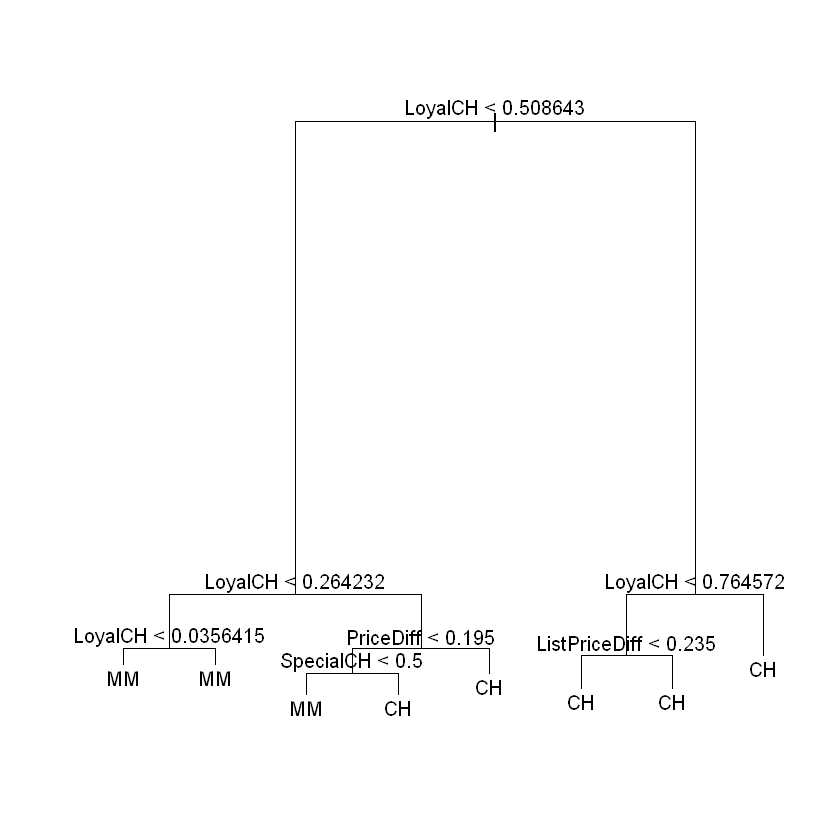

In [39]:
plot(tree.OJ)
text(tree.OJ, pretty = 1)

𝙻𝚘𝚢𝚊𝚕𝙲𝙷 is the most important variable of the tree, in fact top 3 nodes contain 𝙻𝚘𝚢𝚊𝚕𝙲𝙷. 

If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷<𝟶.𝟸64, the tree predicts 𝙼𝙼. 

If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷>𝟶.𝟽𝟼5, the tree predicts 𝙲𝙷. 

For intermediate values of 𝙻𝚘𝚢𝚊𝚕𝙲𝙷, the decision also depends on the value of 𝙿𝚛𝚒𝚌𝚎𝙳𝚒𝚏𝚏.



### 1.4 Predict the response on the test data, and produce the confusion matrix comparing the test labels to the predicted test labels. What is the error rate?

In [40]:
y_hat = predict( tree.OJ, newdata=OJ[-train,], type="class" ) # gives classification labels
CM = table( y_hat, OJ[-train,]$Purchase )   # confusion matrix
print( CM )
print( 'original tree: classificaion error rate on the test dataset:')
#or print( ( CM[1,2] + CM[2,1] ) / sum(CM) )
mean(y_hat!=OJ[-train,]$Purchase)

     
y_hat  CH  MM
   CH 147  49
   MM  12  62
[1] "original tree: classificaion error rate on the test dataset:"


[1] 0.2259259

### 1.5 Apply the <font color="blue">cv.tree()</font> function to the training set in order to determine the optimal tree size. Produce plots with tree size and cross-validation classification error rate. Which tree size is chosen?

In [41]:
# Runs a K-fold cross-validation experiment to find the deviance or number of misclassifications as a
# function of the cost-complexity parameter k.
cv.OJ = cv.tree( tree.OJ, FUN=prune.misclass )
cv.OJ

$size
[1] 8 5 2 1

$dev
[1] 156 156 156 306

$k
[1]       -Inf   0.000000   4.666667 160.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

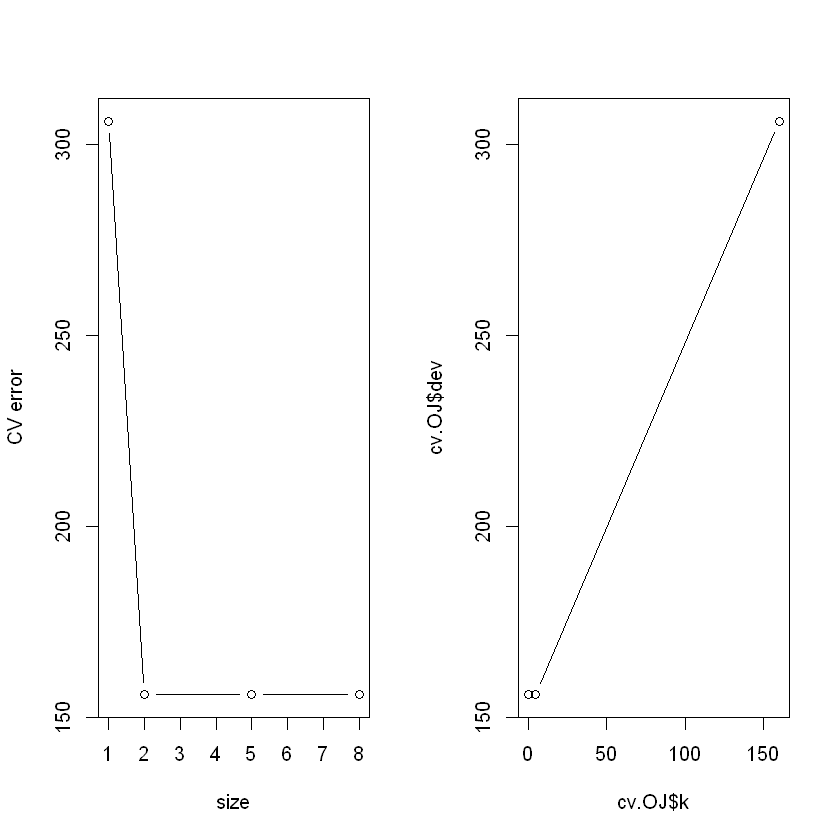

In [44]:
par(mfrow=c(1,2))
plot(cv.OJ$size, cv.OJ$dev, type ="b", xlab="size", ylab="CV error")
# plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.OJ$k, cv.OJ$dev, type="b")

The best size number are 2, 5 and 8. Let's choose 5.

### 1.6 Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.

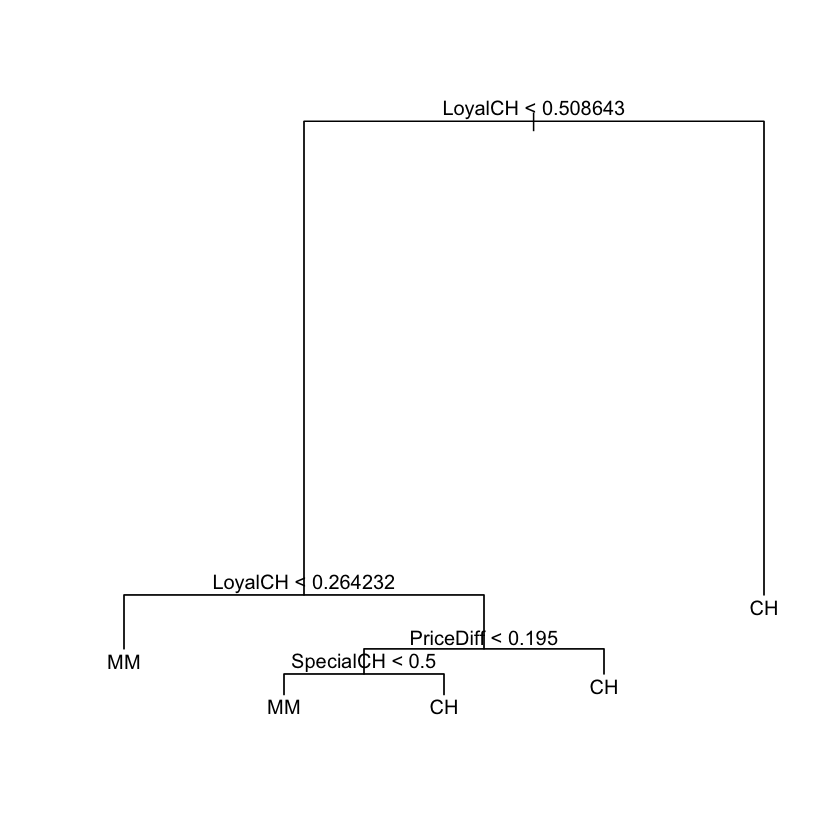

In [12]:
# Determines a nested sequence of subtrees of the supplied tree by recursively “snipping” off the least
# important splits.
# prune.missclass is an abbreviation for prune.tree(method = 'missclass')

prune.OJ = prune.misclass(tree.OJ, best=5 )
plot(prune.OJ)
text(prune.OJ)

### 1.7 Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [13]:
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ[train, ])
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
Number of terminal nodes:  8 
Residual mean deviance:  0.7305 = 578.6 / 792 
Misclassification error rate: 0.165 = 132 / 800 

In [14]:
summary(prune.OJ)


Classification tree:
snip.tree(tree = tree.OJ, nodes = 3:4)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "SpecialCH"
Number of terminal nodes:  5 
Residual mean deviance:  0.8256 = 656.4 / 795 
Misclassification error rate: 0.165 = 132 / 800 

The train error for both classification trees are the same at 0.165, but the residual mean deviance for the pruned tree is higher.

### 1.8 Compare the testing error rates between the pruned and unpruned trees. Which is higher?

In [15]:
y_hat.prune = predict( prune.OJ, newdata=OJ[-train,], type="class" ) # gives classification labels
CM.prune = table( y_hat.prune, OJ[-train,]$Purchase )   # confusion matrix
print( CM.prune )
print( 'prune tree: classificaion error rate on the test dataset:')
# or print( ( CM.prune[1,2] + CM.prune[2,1] ) / sum(CM.prune) )
mean(y_hat.prune!=OJ[-train,]$Purchase)

           
y_hat.prune  CH  MM
         CH 147  49
         MM  12  62
[1] "prune tree: classificaion error rate on the test dataset:"


[1] 0.2259259

## 2. Use boosting to predict Salary in the Hitters dataset 

In this task, we are going to study how to fit a boosted regression tree.

### 2.1 Prepare the training and the testing datasets.
There are some observations for whom the salary information is unknown. We need to exclude those observations from the datasets. And then, log-transform the salaries.

In [21]:
sum(is.na(Hitters$Salary))

[1] 59

In [22]:
Hitters <- na.omit(Hitters)
Hitters$Salary <- log(Hitters$Salary)

As what you have done in the task 1 above, we generate the training and testing splits.

In [23]:
train <- 1:200
Hitters.train <- Hitters[train, ]
Hitters.test <- Hitters[-train, ]

### 2.2 Fit a boosted tree 
Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter $\lambda$.
Produce twos plots:
* one with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.
* one with different shrinkage values on the x-axis and the corresponding testing set MSE on the y-axis.

In [24]:
set.seed(1)

In [25]:
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)

Now, perform the boosting with the setting above.

In [26]:
for (i in 1:length.lambdas) {
    # Fits generalized boosted regression models.
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    # use the built model to predict train data
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    # use the built model to predict test data
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    # calculate train and test error
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

Plot the training/testing MSE as a function of $\lambda$s results below

[1] 0.5 1.0 0.0 1.0

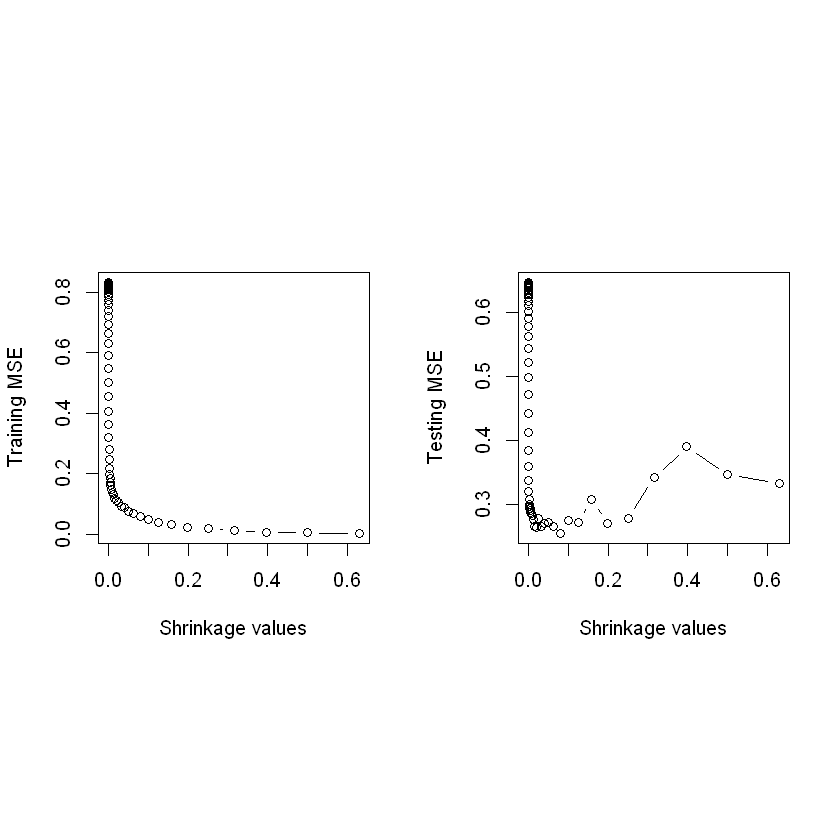

In [27]:
par(mfcol=c(1,2),  pty = "s")
plot(lambdas, train.errors, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage values", ylab = "Testing MSE")
par("fig")

What is the min test error?

In [28]:
min(test.errors)

[1] 0.2540265

In [29]:
lambdas[which.min(test.errors)]

[1] 0.07943282

### 2.3 Comparison

Compare the test MSE of boosting to the test MSE that results from applying the regression approaches: 
* regression 
* lasso regression
* Ridge regression

In [25]:
# fit a linear model
fit1 <- lm(Salary ~ ., data = Hitters.train)
pred1 <- predict(fit1, Hitters.test)
mean((pred1 - Hitters.test$Salary)^2)

[1] 0.4917959

In [26]:
x <- model.matrix(Salary ~ ., data = Hitters.train)
x.test <- model.matrix(Salary ~ ., data = Hitters.test)
y <- Hitters.train$Salary

# Extremely efficient procedures for fitting the entire lasso or elastic-net regularization path for linear regression, 
# logistic and multinomial regression models, Poisson regression and the Cox model. 
# Two recent additions are the multiple-response Gaussian, and the grouped multinomial regression. 
# The algorithm uses cyclical coordinate descent in a path-wise fashion
fit2 <- glmnet(x, y, alpha = 0) # alpha=0 used for Ridge regression
pred2 <- predict(fit2, s = 0.01, newx = x.test)
mean((pred2 - Hitters.test$Salary)^2)

[1] 0.4570283

In [27]:
fit3 <- glmnet(x, y, alpha = 1) # alpha=1 used for Lasso regression
pred3 <- predict(fit3, s = 0.01, newx = x.test)
mean((pred3 - Hitters.test$Salary)^2)

[1] 0.4700537

Both linear model and regularization like Lasso have higher test MSE than boosting.

### 2.4 Which variables appear to be the most important predictors in the boosted model ?

,var,rel.inf
CAtBat,CAtBat,20.8404970
CRBI,CRBI,12.3158959
Walks,Walks,7.4186037
PutOuts,PutOuts,7.1958539
Years,Years,6.3104535
CWalks,CWalks,6.0221656
CHmRun,CHmRun,5.7759763
CHits,CHits,4.8914360
AtBat,AtBat,4.2187460
RBI,RBI,4.0812410


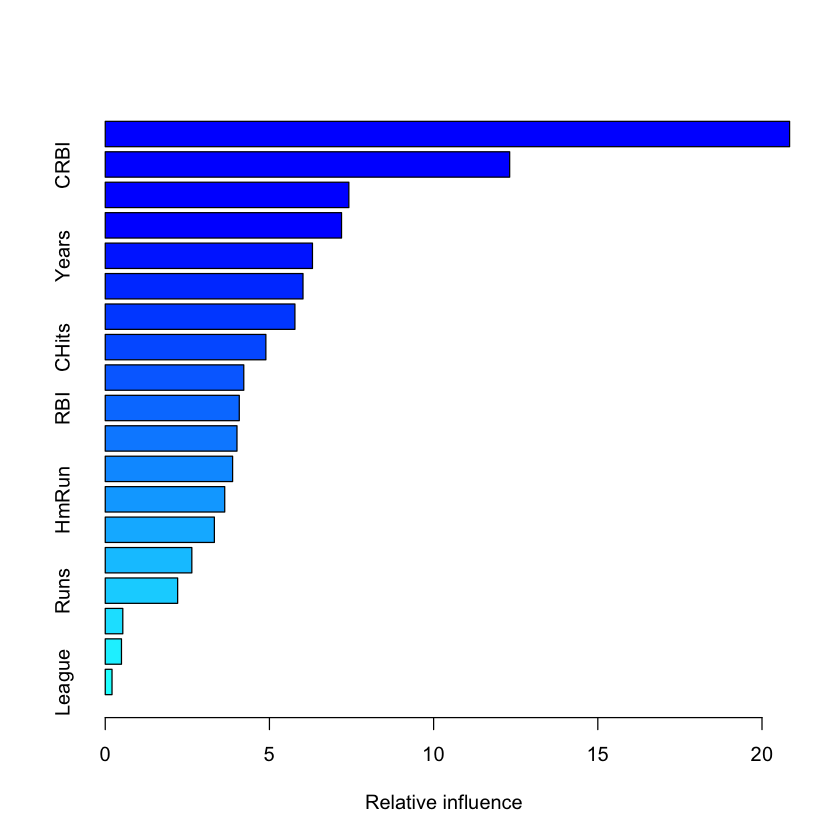

In [28]:
boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, 
                     shrinkage = lambdas[which.min(test.errors)]) # use minimum test error from boosting
summary(boost.hitters)

We may see that “CAtBat” is by far the most important variable.

### 2.5 Now apply bagging to the training set. What is the test set MSE for this approach ?

In [29]:
set.seed(1)
bag.hitters <- randomForest(Salary ~ ., data = Hitters.train, mtry = 19, ntree = 500)
yhat.bag <- predict(bag.hitters, newdata = Hitters.test)
mean((yhat.bag - Hitters.test$Salary)^2)

[1] 0.2299324

The test MSE for bagging is 0.23, which is slightly lower than the test MSE for boosting.